<a href="https://colab.research.google.com/github/2002hk/Stock-prediction-using-sentiment-scores/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go
from tqdm.notebook import tqdm

In [7]:
mf=yf.Ticker('MSFT')

In [8]:
hist=mf.history(period='max')

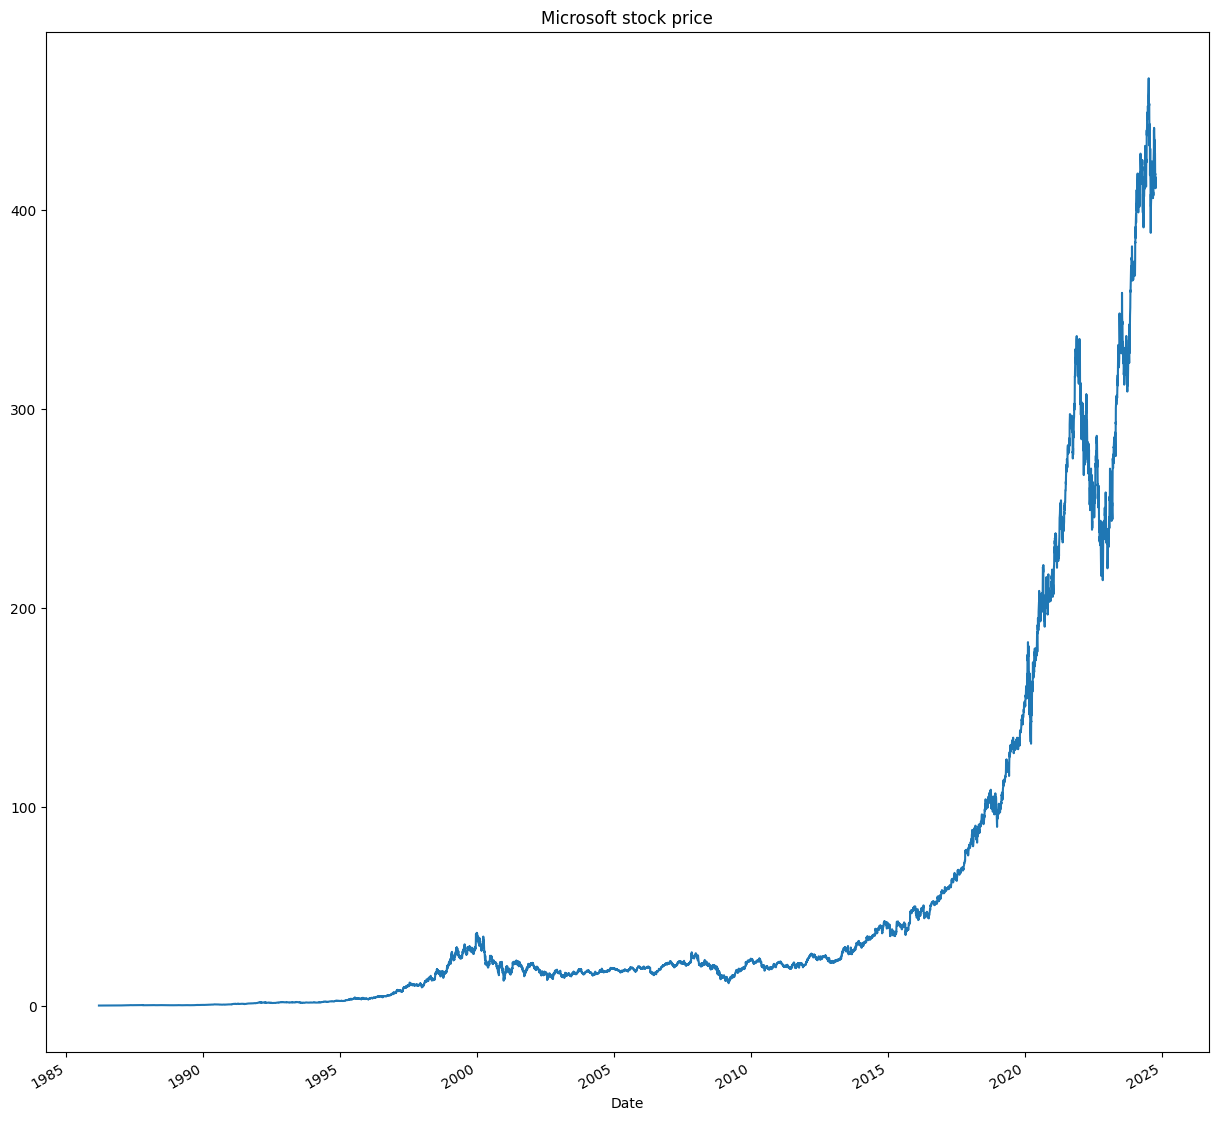

In [9]:
hist['Open'].plot(figsize=(15,15), title='Microsoft stock price')
plt.show()

In [10]:
df=mf.history(period='max')

In [11]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054594,0.062623,0.054594,0.059946,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.059947,0.063158,0.059947,0.062087,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062087,0.063694,0.062087,0.063158,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063158,0.063694,0.061017,0.061552,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061552,0.062087,0.059946,0.060482,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-07 00:00:00-04:00,416.000000,417.109985,409.000000,409.540009,20919800,0.0,0.0
2024-10-08 00:00:00-04:00,410.899994,415.660004,408.170013,414.709991,19229300,0.0,0.0
2024-10-09 00:00:00-04:00,415.859985,420.380005,414.299988,417.459991,14974300,0.0,0.0


In [12]:
fig = go.Figure(
    data=[
        go.Candlestick(
            x=df.index,
            open=df["Open"],
            high=df["High"],
            low=df["Low"],
            close=df["Close"],
        )
    ]
)

# Update the layout
fig.update_layout(
    margin=dict(l=20, r=20, t=60, b=20),
    height=300,
    paper_bgcolor="LightSteelBlue",
    title=" Microsoft Candlestick Chart",
)

# Show the plot
fig.show()

In [13]:
msft_df=mf.history(period='max')

In [14]:
tweets=pd.read_csv('/content/1000 tweets.csv')
tweets.head()

,Unnamed: 0,Datetime,ID,text,username
0,0,"Oct 8, 2024 · 10:48 AM UTC",1753552532935266305,$MSFT #MSFT NFA $SPY I will open call at 👇 ran...,@UttamMarketJ
1,1,"Oct 8, 2024 · 10:32 AM UTC",1803699646516318208,🔥 MSFT(Microsoft Corporation) Stock Prediction...,@riskstock
2,2,"Oct 8, 2024 · 9:16 AM UTC",1825899596444217344,@nunoaires LinkedIn profits #MSFT😂,@cruz_haile
3,3,"Oct 8, 2024 · 9:02 AM UTC",1803699646516318208,🔥 MSFT(Microsoft Corporation) Stock Prediction...,@riskstock
4,4,"Oct 8, 2024 · 7:32 AM UTC",1803699646516318208,🔥 MSFT(Microsoft Corporation) Stock Prediction...,@riskstock


In [15]:
tweets.info()
df=tweets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Datetime    1000 non-null   object
 2   ID          1000 non-null   object
 3   text        1000 non-null   object
 4   username    1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [16]:
import pandas as pd

# Example DataFrame with the problematic date string


# Remove the special character and convert to datetime
df['Datetime'] = df['Datetime'].str.replace(" · ", " ", regex=False)  # Replace special character
df['Datetime'] = pd.to_datetime(df['Datetime'], utc=True)  # Convert to datetime

# Check the result
print(df)


     Unnamed: 0                  Datetime                   ID  \
0             0 2024-10-08 10:48:00+00:00  1753552532935266305   
1             1 2024-10-08 10:32:00+00:00  1803699646516318208   
2             2 2024-10-08 09:16:00+00:00  1825899596444217344   
3             3 2024-10-08 09:02:00+00:00  1803699646516318208   
4             4 2024-10-08 07:32:00+00:00  1803699646516318208   
..          ...                       ...                  ...   
995         995 2024-08-30 13:21:00+00:00  1567283549954252802   
996         996 2024-08-30 13:21:00+00:00  1812377723123150848   
997         997 2024-08-30 13:12:00+00:00  1600326413915152385   
998         998 2024-08-30 12:56:00+00:00  1820471789480218625   
999         999 2024-08-30 12:51:00+00:00  1736635228146606080   

                                                  text         username  
0    $MSFT #MSFT NFA $SPY I will open call at 👇 ran...    @UttamMarketJ  
1    🔥 MSFT(Microsoft Corporation) Stock Prediction...     

In [17]:
#df.info()
df

,Unnamed: 0,Datetime,ID,text,username
0,0,2024-10-08 10:48:00+00:00,1753552532935266305,$MSFT #MSFT NFA $SPY I will open call at 👇 ran...,@UttamMarketJ
1,1,2024-10-08 10:32:00+00:00,1803699646516318208,🔥 MSFT(Microsoft Corporation) Stock Prediction...,@riskstock
2,2,2024-10-08 09:16:00+00:00,1825899596444217344,@nunoaires LinkedIn profits #MSFT😂,@cruz_haile
3,3,2024-10-08 09:02:00+00:00,1803699646516318208,🔥 MSFT(Microsoft Corporation) Stock Prediction...,@riskstock
4,4,2024-10-08 07:32:00+00:00,1803699646516318208,🔥 MSFT(Microsoft Corporation) Stock Prediction...,@riskstock
...,...,...,...,...,...
995,995,2024-08-30 13:21:00+00:00,1567283549954252802,Want to become a better trader? Focus on risk ...,@wallstreetmatt
996,996,2024-08-30 13:21:00+00:00,1812377723123150848,Markets don’t have to be complicated. Find you...,@DayTradeDustin
997,997,2024-08-30 13:12:00+00:00,1600326413915152385,GOOD MORNING FOLKS~PRE-MKT S.I😇=8😡=0 SDex=😇 √...,@EYESON_NEWS
998,998,2024-08-30 12:56:00+00:00,1820471789480218625,🚨 #AI PREDICTS $MSFT COULD RISE 0.72% IN THE N...,@BullishBanterS


In [18]:
from transformers import pipeline
#using pre-trained model for calculating sentiment scores

model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

sentiment_task = pipeline("sentiment-analysis", model=model)
sentiment_task("Covid cases are increasing fast!")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



[{'label': 'negative', 'score': 0.7235766649246216}]

In [19]:
#calculating sentiment scores
from transformers import pipeline
import pandas as pd
from tqdm import tqdm

# Load the sentiment analysis model
model = "cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_task = pipeline("sentiment-analysis", model=model)



# Filter out empty or NaN values
df = df[df['text'].notna() & (df['text'] != '')]

# Prepare to collect results
sent_results = {}
batch_size = 2  # Define a batch size

# Process the DataFrame in batches
for i in tqdm(range(0, len(df), batch_size)):
    batch_texts = df['text'].iloc[i:i+batch_size].tolist()
    try:
        sentiments = sentiment_task(batch_texts)  # Process the batch

        # Store results
        for j, sent in enumerate(sentiments):
            sent_results[df.iloc[i + j]["ID"]] = sent
    except Exception as e:
        print(f"Error processing batch starting at index {i}: {e}")

# Check results
print(sent_results)


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
  7%|▋         | 36/500 [00:23<05:24,  1.43it/s]

Error processing batch starting at index 70: The expanded size of the tensor (1562) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1562].  Tensor sizes: [1, 514]


 39%|███▊      | 193/500 [02:08<02:38,  1.93it/s]

Error processing batch starting at index 384: The expanded size of the tensor (764) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 764].  Tensor sizes: [1, 514]


100%|██████████| 500/500 [05:34<00:00,  1.49it/s]

{'1753552532935266305': {'label': 'neutral', 'score': 0.8380160927772522}, '1803699646516318208': {'label': 'neutral', 'score': 0.8731204867362976}, '1825899596444217344': {'label': 'neutral', 'score': 0.6646166443824768}, '1736635228146606080': {'label': 'neutral', 'score': 0.8152773380279541}, '1648672404191735811': {'label': 'positive', 'score': 0.8102675676345825}, '1626930896124391424': {'label': 'neutral', 'score': 0.6937121748924255}, 'default_profile_bigger.png': {'label': 'negative', 'score': 0.5644940733909607}, '1409300043383857158': {'label': 'neutral', 'score': 0.5415862202644348}, '1842245383033860096': {'label': 'neutral', 'score': 0.5758175849914551}, '1503098474581176321': {'label': 'neutral', 'score': 0.7922170162200928}, '1685368224144089088': {'label': 'neutral', 'score': 0.7437075972557068}, '1588907121025765378': {'label': 'neutral', 'score': 0.6838063597679138}, '1839149204062777345': {'label': 'neutral', 'score': 0.7713748812675476}, '1820610845128175616': {'lab

In [20]:
temp_df = pd.DataFrame(sent_results).T


In [21]:
temp_df

,label,score
1753552532935266305,neutral,0.838016
1803699646516318208,neutral,0.87312
1825899596444217344,neutral,0.664617
1736635228146606080,neutral,0.815277
1648672404191735811,positive,0.810268
...,...,...
1793678789802627072,neutral,0.705845
1822699252474142720,neutral,0.86881
1780421471774642176,neutral,0.720001
1202412779845627904,neutral,0.853432


In [22]:
#merging sentiment scores with original data
temp_df = temp_df.merge(
    df.set_index("ID"), left_index=True, right_index=True
)

In [23]:
temp_df

,label,score,Unnamed: 0,Datetime,text,username
1753552532935266305,neutral,0.838016,0,2024-10-08 10:48:00+00:00,$MSFT #MSFT NFA $SPY I will open call at 👇 ran...,@UttamMarketJ
1753552532935266305,neutral,0.838016,25,2024-10-07 18:44:00+00:00,$MSFT #MSFT that’s why I closed it NFA $SPY 4...,@UttamMarketJ
1753552532935266305,neutral,0.838016,153,2024-10-03 14:03:00+00:00,$MSFT #MSFT call 415.86-413.10 $SPY That was ...,@UttamMarketJ
1753552532935266305,neutral,0.838016,185,2024-10-02 17:46:00+00:00,$MSFT #MSFT Call here NFA SL below 417.49,@UttamMarketJ
1753552532935266305,neutral,0.838016,186,2024-10-02 16:41:00+00:00,$MSFT #MSFT has 30m- an hour to push it higher...,@UttamMarketJ
...,...,...,...,...,...,...
1793678789802627072,neutral,0.705845,985,2024-08-31 02:17:00+00:00,#MSFT and #PLTR team up in an effort to bridge...,@DjChaneleleven
1822699252474142720,neutral,0.86881,988,2024-08-30 19:51:00+00:00,#MSFT Daily Chart,@Burim3882
1780421471774642176,neutral,0.720001,990,2024-08-30 16:18:00+00:00,Stock market/stocks updates! $SPY $NVDA $FSLR ...,@DerekInvests
1202412779845627904,neutral,0.853432,991,2024-08-30 16:16:00+00:00,"$MSFT short for 3.2R, also $NFLX R4 long for -...",@TurboBreakEven


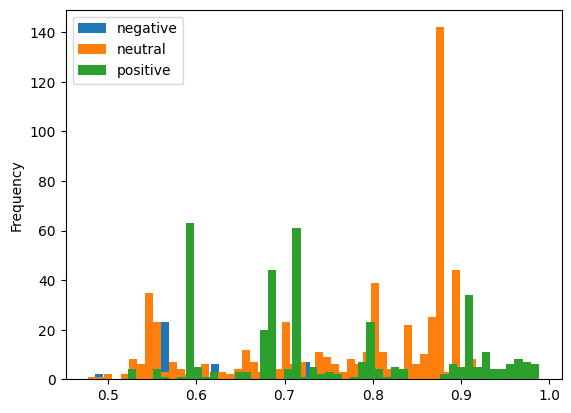

In [24]:
#visual distribution of sentiment scores
temp_df.groupby("label")["score"].plot(kind="hist", bins=50)
plt.legend()
plt.show()

#### Following steps are data cleaning and pre-processing

In [25]:
temp_df['avg_daily_sentiment']=temp_df.groupby('Datetime')['score'].transform('mean')

In [26]:
temp_df['Datetime'] = temp_df['Datetime'].dt.tz_convert('Asia/Kolkata')


In [27]:
print(temp_df['Datetime'].dt.tz)

Asia/Kolkata


In [28]:
temp_df['date']=temp_df['Datetime'].dt.date

In [29]:
msft_df['SMA_5']=msft_df['Close'].rolling(window=5).mean()

In [30]:
#this is stock data extracted from y finance
msft_df.reset_index(inplace=True)
msft_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9724 entries, 0 to 9723
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          9724 non-null   datetime64[ns, America/New_York]
 1   Open          9724 non-null   float64                         
 2   High          9724 non-null   float64                         
 3   Low           9724 non-null   float64                         
 4   Close         9724 non-null   float64                         
 5   Volume        9724 non-null   int64                           
 6   Dividends     9724 non-null   float64                         
 7   Stock Splits  9724 non-null   float64                         
 8   SMA_5         9720 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(7), int64(1)
memory usage: 683.8 KB


In [31]:
msft_df.rename(columns={'Date': 'Datetime'}, inplace=True)


In [32]:
msft_df['date']=msft_df['Datetime'].dt.date

In [33]:

import pandas as pd

# Example DataFrames (data and stock_data)
# temp_df: DataFrame with sentiment scores
# msft_df: DataFrame with stock prices

# Assuming both DataFrames have a 'date' column to merge on
combined_data = pd.merge(temp_df, msft_df, on='date', how='inner')

# Display the combined DataFrame
print(combined_data)


        label     score  Unnamed: 0                Datetime_x  \
0     neutral  0.838016           0 2024-10-08 16:18:00+05:30   
1     neutral  0.838016          25 2024-10-08 00:14:00+05:30   
2     neutral  0.838016         153 2024-10-03 19:33:00+05:30   
3     neutral  0.838016         185 2024-10-02 23:16:00+05:30   
4     neutral  0.838016         186 2024-10-02 22:11:00+05:30   
..        ...       ...         ...                       ...   
766  positive  0.824868         919 2024-09-03 15:37:00+05:30   
767  positive  0.734134         927 2024-09-03 05:04:00+05:30   
768   neutral  0.720001         990 2024-08-30 21:48:00+05:30   
769   neutral  0.853432         991 2024-08-30 21:46:00+05:30   
770   neutral  0.625074         992 2024-08-30 21:30:00+05:30   

                                                  text         username  \
0    $MSFT #MSFT NFA $SPY I will open call at 👇 ran...    @UttamMarketJ   
1    $MSFT #MSFT that’s why I closed it NFA $SPY  4...    @UttamMarke

In [34]:
combined_data.head()

,label,score,Unnamed: 0,Datetime_x,text,username,avg_daily_sentiment,date,Datetime_y,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_5
0,neutral,0.838016,0,2024-10-08 16:18:00+05:30,$MSFT #MSFT NFA $SPY I will open call at 👇 ran...,@UttamMarketJ,0.838016,2024-10-08,2024-10-08 00:00:00-04:00,410.899994,415.660004,408.170013,414.709991,19229300,0.0,0.0,414.796002
1,neutral,0.838016,25,2024-10-08 00:14:00+05:30,$MSFT #MSFT that’s why I closed it NFA $SPY 4...,@UttamMarketJ,0.838016,2024-10-08,2024-10-08 00:00:00-04:00,410.899994,415.660004,408.170013,414.709991,19229300,0.0,0.0,414.796002
2,neutral,0.838016,153,2024-10-03 19:33:00+05:30,$MSFT #MSFT call 415.86-413.10 $SPY That was ...,@UttamMarketJ,0.838016,2024-10-03,2024-10-03 00:00:00-04:00,417.630005,419.549988,414.290009,416.540009,13686400,0.0,0.0,422.535999
3,neutral,0.838016,185,2024-10-02 23:16:00+05:30,$MSFT #MSFT Call here NFA SL below 417.49,@UttamMarketJ,0.838016,2024-10-02,2024-10-02 00:00:00-04:00,422.579987,422.820007,416.709991,417.130005,16582300,0.0,0.0,425.489996
4,neutral,0.838016,186,2024-10-02 22:11:00+05:30,$MSFT #MSFT has 30m- an hour to push it higher...,@UttamMarketJ,0.838016,2024-10-02,2024-10-02 00:00:00-04:00,422.579987,422.820007,416.709991,417.130005,16582300,0.0,0.0,425.489996


In [35]:
combined_data.info()
stock_data=combined_data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype                           
---  ------               --------------  -----                           
 0   label                771 non-null    object                          
 1   score                771 non-null    object                          
 2   Unnamed: 0           771 non-null    int64                           
 3   Datetime_x           771 non-null    datetime64[ns, Asia/Kolkata]    
 4   text                 771 non-null    object                          
 5   username             771 non-null    object                          
 6   avg_daily_sentiment  771 non-null    object                          
 7   date                 771 non-null    object                          
 8   Datetime_y           771 non-null    datetime64[ns, America/New_York]
 9   Open                 771 non-null    float64                     

In [36]:
# Calculating stock movement
stock_data['stock_movement'] = (stock_data['Close'].shift(-1) > stock_data['Close']).astype(int)


In [37]:
stock_data.dropna(subset=['stock_movement'], inplace=True)

In [38]:
stock_data[['date', 'Close', 'stock_movement']]

,date,Close,stock_movement
0,2024-10-08,414.709991,0
1,2024-10-08,414.709991,1
2,2024-10-03,416.540009,1
3,2024-10-02,417.130005,0
4,2024-10-02,417.130005,1
...,...,...,...
766,2024-09-03,409.440002,0
767,2024-09-03,409.440002,1
768,2024-08-30,417.140015,0
769,2024-08-30,417.140015,0


In [39]:
stock_data['stock_movement'].value_counts()

,count
stock_movement,
0,564
1,207


In [40]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split data into training and testing sets
x = stock_data[['avg_daily_sentiment', 'SMA_5']]  # Add more features as needed
y = stock_data['stock_movement']  # 1 for price up, 0 for price down
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Logistic Regression Model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)


In [41]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.72      1.00      0.83       111
           1       0.00      0.00      0.00        44

    accuracy                           0.72       155
   macro avg       0.36      0.50      0.42       155
weighted avg       0.51      0.72      0.60       155



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## I was able to extract only 1,000 rows of tweets, and due to this limited dataset, the distribution for the train-test split was not uniform. This has resulted in an imbalance, with a significantly higher number of 0 values compared to 1s in the stock movement data. Consequently, the model is currently biased toward predicting the 0 value more often, and it struggles to accurately predict the 1 values.

In [42]:
y_test.value_counts()

,count
stock_movement,
0,111
1,44
